# __Exploring eBay Car Sales Data__

In this project, we will work with a dataset of used cars from eBay Kleinanzeigen wich is a section of the German eBay website. The data was originally scraped and uploaded to Kaggle by the user [orgesleka](‘https://www.kaggle.com/orgesleka’). Orgesleka has deleted their Kaggle account but the data is still available from the website [data.world]('https://data.world/data-society/used-cars-data’). 

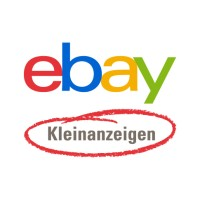

However the people at [data.world](https://data.world/data-society) have made some modifications to the original dataset created by [orgesleka](‘https://www.kaggle.com/orgesleka’).
- The new dataset has sampled 50,000 data points from the full 370,000 to ensure that the code runs quickly in hosted environments. 
- They have also dirtied the dataset making it more inline with what you would expect from scraped data as [orgesleka](‘https://www.kaggle.com/orgesleka’) upladed a cleaned version to Kaggle.


Below we can see the columns for the data frame:

- `dateCrawled` - When this ad was first crawled. All field-values are taken from this date.
- `name` - Name of the car.
- `seller` - Whether the seller is private or a dealer.
- `offerType` - The type of listing
- `price` - The price on the ad to sell the car.
- `abtest` - Whether the listing is included in an A/B test.
- `vehicleType` - The vehicle Type.
- `yearOfRegistration` - The year in which the car was first registered.
- `gearbox` - The transmission type.
- `powerPS` - The power of the car in PS.
- `model` - The car model name.
- `kilometer` - How many kilometers the car has driven.
- `monthOfRegistration` - The month in which the car was first registered.
- `fuelType` - What type of fuel the car uses.
- `brand` - The brand of the car.
- `notRepairedDamage` - If the car has a damage which is not yet repaired.
- `dateCreated` - The date on which the eBay listing was created.
- `nrOfPictures` - The number of pictures in the ad.
- `postalCode` - The postal code for the location of the vehicle.
- `lastSeenOnline` - When the crawler saw this ad last online.

# __Importing Data__

Now that we are familiar with the structure of the data, we can now import the data and begin our analysis. We will also increase the max rows option to allow us to look at any number of rows. 

In [1]:
import pandas as pd 
import numpy as np
pd.set_option("display.max_rows", None)

In [2]:
open_file = open(r'autos.csv')
read_file = pd.read_csv(open_file)
autos = read_file

Now we can look at the first couple of rows by using the [DataFrame.head()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) function and inspect the dataframe with the [DataFrame.info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) function.

In [3]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [4]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date


When we look at the dataframe we can see the following things:
- The dataframe contains 20 columns mainly being made up of `objects`, but also contain `int64`
- Some of the columns have `NULL` values, but none of the columns have more than 20% `NULL`
- The column names use the [CamelCase]( https://en.wikipedia.org/wiki/Camel_case) instead of Python’s preferred [snakecase](https://en.wikipedia.org/wiki/Snake_case)


# __Cleaning the DataFrame__

## __Camelcase vs Snakecase__

Now we need to convert our column names from camelcase into snakecase we can do this by editing a copy of the columns and assigning them back to the dataframe.

In [5]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [6]:
snake_copy = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'n_pictures', 'postal_code',
       'last_seen']

autos.columns = snake_copy

autos.head()

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,n_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


As we can see the columns have now been converted to snakecase this is in line with [PEP]( https://www.python.org/dev/peps/pep-0008/) making the dataframe easier to read and work with.

## __Describing Data__

Now we will look for the following things in the dataframe:
- Any columns that have mostly one value that are candidates to be dropped
- Any columns that need more investigation
- Any examples of numeric data stored as text that needs to be changed.  


In [7]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,n_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-27 22:55:05,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


## __Dropping Columns__

We will now explore columns with less than 10 unique entries to see if they can be removed. If the column has mainly only one value, then it will be removed.

In [8]:
seller = autos['seller'].value_counts()
offer_type = autos['offer_type'].value_counts()
ab_test = autos['ab_test'].value_counts()
vehicle_type = autos['vehicle_type'].value_counts()
gearbox = autos['gearbox'].value_counts()
fuel_type = autos['fuel_type'].value_counts()
unrepaired_damage = autos['unrepaired_damage'].value_counts()
n_pictures = autos['n_pictures'].value_counts()

print('seller')
print(seller)
print('\n')
print('offer_type')
print(offer_type)
print('\n')
print('ab_test')
print(ab_test)
print('\n')
print('vehicle_type')
print(vehicle_type)
print('\n')
print('gearbox')
print(gearbox)
print('\n')
print('fuel_type')
print(fuel_type)
print('\n')
print('unrepaired_damage')
print(unrepaired_damage)
print('\n')
print('n_pictures')
print(n_pictures)

seller
privat        49999
gewerblich        1
Name: seller, dtype: int64


offer_type
Angebot    49999
Gesuch         1
Name: offer_type, dtype: int64


ab_test
test       25756
control    24244
Name: ab_test, dtype: int64


vehicle_type
limousine     12859
kleinwagen    10822
kombi          9127
bus            4093
cabrio         3061
coupe          2537
suv            1986
andere          420
Name: vehicle_type, dtype: int64


gearbox
manuell      36993
automatik    10327
Name: gearbox, dtype: int64


fuel_type
benzin     30107
diesel     14567
lpg          691
cng           75
hybrid        37
andere        22
elektro       19
Name: fuel_type, dtype: int64


unrepaired_damage
nein    35232
ja       4939
Name: unrepaired_damage, dtype: int64


n_pictures
0    50000
Name: n_pictures, dtype: int64


As we can see above the only columns that have predominantly one value are `seller` , `offer_type` and ` n_pictures`.  The seller’s column contains data showing that 49,999 sales where through private methods and only 1 were sold via request.  For the `offer_type` column we can see that one entry offer makes up over 49,999 entries while request only appears 1 times. The `n_pictures` column only contains the value zero. 

This makes these columns ideal candidates to be dropped, as the other columns we investigated had their entries more distributed between the unique entries. 

In [9]:
autos_drop = autos.drop(['seller','offer_type','n_pictures'], axis=1)
autos_drop.head()

,date_crawled,name,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,39218,2016-04-01 14:38:50


## __Converting Data Type of Column__

Now that we have dropped the columns that contain mostly one value, now we will look for columns that are numeric data stored as text objects. As we can see in the previous `describe()` output above we can see that the `price` and the `odometer` need to be converted. We will do this the following way:
- Remove any non-numeric charecters. 
- Convert the column to numeric dtype.
- Use the `DataFrame.rename()` to rename the columns 

### __Removing Non-Numeric Charecters__

To remove the non-numeric characters from the `odometer` and `price` series we will use the [`replace()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) function to remove the `km` from `odometer`, the `$` from `price` and  `,` from both of the series.

In [10]:
autos_drop['odometer'] = autos_drop['odometer'].str.replace('km','').str.replace(',','')
autos_drop['price'] = autos_drop['price'].str.replace('$','', regex=True).str.replace(',','')

print(autos_drop[['odometer','price']].head())

  odometer price
0   150000  5000
1   150000  8500
2    70000  8990
3    70000  4350
4   150000  1350


### __Convert the Column to Numeric Data Type__

Now that we have removed the non-numeric characters from the `odometer` and `price` series, we now convert them from an `object` type to `int` type to allow easier manipulation later in the project. we can convert the data type using the [`astype()`]( https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html) function. 



In [11]:
autos_drop['odometer'] = autos_drop['odometer'].astype(int)
autos_drop['price'] = autos_drop['price'].astype(int)

autos_drop[['odometer','price']].describe()

,odometer,price
count,50000.000000,5.000000e+04
mean,125732.700000,9.840044e+03
std,40042.211706,4.811044e+05
min,5000.000000,0.000000e+00
25%,125000.000000,1.100000e+03
50%,150000.000000,2.950000e+03
75%,150000.000000,7.200000e+03
max,150000.000000,1.000000e+08


### __Renaming Columns__

Now we can rename our numeric columns to better describe the contains by including the units. We will add km and $ to the columns using the [`rename()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html ) function. 

In [12]:
autos_drop.rename({'odometer':'odometer_km'}, axis = 1, inplace = True)
autos_drop.rename({'price':'€_price'}, axis = 1, inplace = True)

autos = autos_drop

autos[['odometer_km','€_price']].head()

,odometer_km,€_price
0,150000,5000
1,150000,8500
2,70000,8990
3,70000,4350
4,150000,1350


## __Removing Outlining Data__

We will now explore the odometer_km and the $_price to find outlying data and remove it.  We will start by looking at the odometer_km column using the[`unique`]( https://pandas.pydata.org/docs/reference/api/pandas.unique.html),  [`shpe`]( https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.shape.html), [`describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html), [`value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) functions.

### __Removing Outlining odometer_km Values__

In [13]:
autos['odometer_km'].unique().shape

(13,)

As seen in the cell above, there are 13 unique `odometer_km` values. We can use the [` value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)  and [`describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) function to see how the values are distributed. 

In [14]:
autos['odometer_km'].value_counts()

150000    32424
125000     5170
100000     2169
90000      1757
80000      1436
70000      1230
60000      1164
50000      1027
5000        967
40000       819
30000       789
20000       784
10000       264
Name: odometer_km, dtype: int64

In [15]:
autos['odometer_km'].describe()

count     50000.000000
mean     125732.700000
std       40042.211706
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

As we see above, the `odometer_km` column the data is skewed to the left with the mean being lower than the mode. That said, there appears to be no dramatic outliners. The maximum value which is also the mode is 150,000 km which is reasonable for a used car. The minimum of 5,000 km is also appears to be a reasonable number of kilometres for a used car. 

### __Removing Outlining €_price Values__

In [16]:
autos['€_price'].unique().shape

(2357,)

As seen in the cell above, there are 2357 unique `€_price` values. This is far greater than the unique values for the `odometer_km` columns. Due to this is more likely that there will be more outlining values. Next we will use the [`describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) function to look at the statistical values.

In [17]:
autos['€_price'].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: €_price, dtype: float64

When looking at the output above we see that the data is values are widely distributed. This can be seen with the standard distribution for the price is €48,1104.40. This is suspicions as the mean price is € 9,840.04. This could be a result of having the values being mainly skewed towards both the maximum (€ 100,000,000.00) and the minimum (€ 0.00).  The data being skewed this way also is supported by the lower quartile (€ 1,100.00), median (€ 2,950.00), and upper quartile (€ 7200.00) are all within the same magnitude. 

So, the next step would be to look at the values located around both the maximum and minimum values. For the maximum values we will look at how many cars have prices above € 150k, € 100k, € 50k, and € 10k. To do this we make a Boolean index with where we filter for prices greater than our desired value. We will then select the €_price from our selection and use the pandas [`size`](https://pandas.pydata.org/docs/reference/api/pandas.Series.size.html) method to see how many cars meet our criteria.

In [18]:
high_price_150k = autos[autos['€_price']> 150000]
high_price_100k = autos[autos['€_price']> 100000]
high_price_50k = autos[autos['€_price']> 50000]
high_price_10k = autos[autos['€_price']> 10000]

print('Number of cars over 150k')
print(high_price_150k['€_price'].size)
print('\n')
print('Number of cars over 100k')
print(high_price_100k['€_price'].size)
print('\n')
print('Number of cars over 50k')
print(high_price_50k['€_price'].size)
print('\n')
print('Number of cars over 10k')
print(high_price_10k['€_price'].size)

Number of cars over 150k
34


Number of cars over 100k
53


Number of cars over 50k
200


Number of cars over 10k
8073


As we can see, wen we look as cars priced over € 10k we see that there are 8000+ values. This is a massive increase compared with cars over € 50k as there are only 200 entries. Due to this it would make sense to remove values where the `€_price` is over € 50k. 

Now that we have found outliners towards the maximum values. Now we will use similar techniques to inspect values towards the minimum of the array.   We will look at values equal to 0, less than € 500, € 1k, € 5k. 

In [19]:
low_price_0 = autos[autos['€_price']<= 0]
low_price_100 = autos[autos['€_price']<= 100]
low_price_500 = autos[autos['€_price']<= 500]
low_price_1k = autos[autos['€_price']<= 1000]

print('Number of cars equal to 0')
print(low_price_0['€_price'].size)
print('\n')
print('Number of cars under 100')
print(low_price_100['€_price'].size)
print('\n')
print('Number of cars under 500')
print(low_price_500['€_price'].size)
print('\n')
print('Number of cars under 1k')
print(low_price_1k['€_price'].size)

Number of cars equal to 0
1421


Number of cars under 100
1896


Number of cars under 500
5670


Number of cars under 1k
11999


We can see that there are 1896 values that are less than € 100 which are unrealistically low. We will therefore remove values between € 50,000 and € 100 as that will hopefully give us a more realistic data. 

In [20]:
autos = autos[autos['€_price'].between(100,50000)]

autos['€_price'].describe()

count    48038.000000
mean      5611.942691
std       6723.459745
min        100.000000
25%       1250.000000
50%       3000.000000
75%       7400.000000
max      50000.000000
Name: €_price, dtype: float64

We can now see that we have removed about 2,000 entries but our new standard deviation is now smaller meaning that the data is better distributed.  

## __Exploring The Date Columns__

Let’s now move to the data columns. There are 5 columns that represent date values. Some created by the crawler, other created came from the website itself. We can see these columns bellow:
- `date_crawled`: added by the crawler
- `last_seen`: added by the crawler
- `ad_created`: from the website
- `registration_month`: from the website 
- `registration_year`: from the website

When we look back to when we looked at the data types we saw in the beginning of the project, we see that some of these dates are stored as `str` and some as `int`. The `date_crawled`, `last_seen`, `ad_created` are stored as `str` so we need to convert it into a numeric representation so we can understand it quantitatively.

To do this we need to inspect how these three columns are formatted. 

### __Formating date_crawled, ad_created and last_seen Column__

In [21]:
autos[['date_crawled', 'ad_created','last_seen']][0:5]

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


As we can see in the output above, we can see that the first 10 characters represents the day. We can extract the first 10 characters by using pandas [`vectorized string functions`]( https://pandas.pydata.org/docs/reference/api/pandas.Series.str.html)  and slicing the string from character `0` to `9`.  

Let’s look at this output using the `date_crawled` column.

In [22]:
autos['date_crawled'] = autos['date_crawled'].str.split(r' ').str[0]
autos['ad_created'] = autos['ad_created'].str.split(r' ').str[0]
autos['last_seen'] = autos['last_seen'].str.split(r' ').str[0]

autos['date_crawled'].str[:10].head()

<ipython-input-22-30152bdb52ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autos['date_crawled'] = autos['date_crawled'].str.split(r' ').str[0]
<ipython-input-22-30152bdb52ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autos['ad_created'] = autos['ad_created'].str.split(r' ').str[0]
<ipython-input-22-30152bdb52ab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

0    2016-03-26
1    2016-04-04
2    2016-03-26
3    2016-03-12
4    2016-04-01
Name: date_crawled, dtype: object

Now we can see that we are able to extract the date from the strings. We can now use the [`value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) to inspect the distribution of when dates. We will also specify `normalize` to represent the counts as a relative frequency, we will also specify `dropna` as false to include missing values.

In [23]:
autos_date_c  = autos['date_crawled'].str[:10].value_counts(normalize=True,dropna = False).mul(100).round(1).astype(str) + '%' 
autos_date_c.sort_index().head()

2016-03-05    2.5%
2016-03-06    1.4%
2016-03-07    3.6%
2016-03-08    3.3%
2016-03-09    3.3%
Name: date_crawled, dtype: object

As we see above the `date crawled` column appears to be evenly distributed, every single day has less then `4%`. This shows us that the crawler crated this data evenly between March and April 2016. We will use the same syntax as above to explore the `ad_created` and `last_seen`column.

In [24]:
autos_ad_created  = autos['ad_created'].str[:10].value_counts(normalize=True,dropna = False).mul(100).round(1).astype(str) + '%' 
autos_ad_created.sort_index().head()

2015-06-11    0.0%
2015-08-10    0.0%
2015-09-09    0.0%
2015-11-10    0.0%
2015-12-05    0.0%
Name: ad_created, dtype: object

The `ad_created` column contains dates from June 2015 to April 2016. The majority of ads in the dataset were created after the date on which data was crawled for the first time.  This is in line with what we expected as eBay Kleinanzeigen host live actions for cars so it is reasonable that the auctions do not last months on-end. 

In [25]:
autos_last_seen = autos['last_seen'].str[:10].value_counts(normalize=True,dropna = False).mul(100).round(1).astype(str)+'%'
autos_last_seen.sort_index()

2016-03-05     0.1%
2016-03-06     0.4%
2016-03-07     0.5%
2016-03-08     0.7%
2016-03-09     1.0%
2016-03-10     1.1%
2016-03-11     1.2%
2016-03-12     2.4%
2016-03-13     0.9%
2016-03-14     1.3%
2016-03-15     1.6%
2016-03-16     1.6%
2016-03-17     2.8%
2016-03-18     0.7%
2016-03-19     1.6%
2016-03-20     2.1%
2016-03-21     2.1%
2016-03-22     2.1%
2016-03-23     1.9%
2016-03-24     2.0%
2016-03-25     1.9%
2016-03-26     1.7%
2016-03-27     1.6%
2016-03-28     2.1%
2016-03-29     2.2%
2016-03-30     2.5%
2016-03-31     2.4%
2016-04-01     2.3%
2016-04-02     2.5%
2016-04-03     2.5%
2016-04-04     2.5%
2016-04-05    12.5%
2016-04-06    22.2%
2016-04-07    13.2%
Name: last_seen, dtype: object

We can see that the data is left skewed with the with the majority of the data (`47.6%`) grouped within the last 3 days. This may be due to the nature if the crawler, as these spikes occurred during the last couple of data extraction and due to a spike in second hand car sales in early April. 

## __Expolring Registration__

Now we will now look at both the `registration month` and ` registration year`. We will start with looking at the registration month, we expect to see the values spread evenly over the months of the year. We can simply use the [`value_counts`]( https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) function. 

###  __Expolring registration_month__

In [26]:
autos['registration_month'].value_counts()

3     4958
0     4310
6     4226
5     4009
4     4004
7     3811
10    3569
12    3349
9     3305
11    3288
1     3188
8     3107
2     2914
Name: registration_month, dtype: int64

As we can see, the moths appear to be evenly distributed. One curious thing however is that there appear to be 13 months. The month `0` has `5075` entries, this is odd as there is no month zero. Looking at the data it appears that the `0` month is assigned when there appeared to be no `registration_month`.

However, as the documentations for this dataset appears to have been deleted along with the original post, we will remove these values using the pandas [`between()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.between.html) as we cannot confirm what they are. 

In [27]:
autos = autos[autos['registration_month'].between(1,12)]

autos['registration_month'].describe()

count    43728.000000
mean         6.371913
std          3.350165
min          1.000000
25%          3.000000
50%          6.000000
75%          9.000000
max         12.000000
Name: registration_month, dtype: float64

### __Expolring registration_year__

Now we will look at the `registration_year`, which we can predict to have more values compared to the `registration_month` as there will be a much greater range as `registration_month` only have 12 values. We will use the pandas [`describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) function to look at the descriptive statistics of the series. 

In [28]:
autos['registration_year'].describe()

count    43728.000000
mean      2004.053901
std         44.435961
min       1800.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9000.000000
Name: registration_year, dtype: float64

When we look at the descriptive statistics of the ` registration_year` we instantly see some suspicious numbers.  The `min` ` registration_year` is `1800`, this is obviously not possible as the car was not invented until [1886 by German inventor Carl Benz]( https://en.wikipedia.org/wiki/Benz_Patent-Motorwagen) and the first commercial car was not manufactured until [1908 by the Ford Motor Company](https://en.wikipedia.org/wiki/Ford_Model_T).  There also appears to be an issue with the `max` value as it’s the year`9000`. This is odiously not possible as this data was collected in `2016` so that is our maximum possible year, meaning that any year grafter that `2016` must have been an error

The other values do however appear to be what we expected. The `mean` being `2004` and the interquartile range being at `1999` and `2008` makes sense for used cars sold in `2016`. The last stat that we should look at would be the standard deviation. Standard deviation (`44.44 years`) appears to be small in comparison with the large number in our dataset, this tells us that there are a small number of outliners in our dataset. 

To remove the extreme outliners we will use the pandas [`between()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.between.html) function again and we will select values between `1900` and `2016`.


In [29]:
autos = autos[autos['registration_year'].between(1900,2016)]


autos['registration_year'].describe()

count    42305.000000
mean      2003.201276
std          6.883309
min       1927.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       2016.000000
Name: registration_year, dtype: float64

As we see in the new descriptive statistics a total of `1,432` cars were removed. The `registration_year` new `min` and `max` appear to be reasonable values being `1927` and `2016`. We also see that  the interquartile range did not change and the standard deviation became much smaller as we predicted. 

We will now look at the distribution of the `registration_year` using the [`value_count()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) to look at the relative frequency for each years.

In [30]:
autos_reg_y = autos['registration_year'].value_counts(normalize=True).mul(100).round(3).astype(str) + '%'
autos_reg_y.sort_index(ascending=False).head()

2016    2.134%
2015    0.801%
2014    1.508%
2013    1.822%
2012    3.011%
Name: registration_year, dtype: object

Now that we see the value counts for the ` registration_year` we can see that the majority of cars being sold are between the 7-18 years old. This is not surprising as that is a common age range for a car to be sold second hand. 

## __Exploring Price of Car Brands__

The next part of our analysis is to look at the `brand` column of the cars sold and see what the average price for each of the brands are. Let’s use the [`describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) and [`value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) function to look at how the `brand` column.

In [31]:
autos['brand'].describe()

count          42305
unique            40
top       volkswagen
freq            8851
Name: brand, dtype: object

We can see in the [`describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) output above we can see that there are 40 unique car brands in the dataset. We can now use the [`value_counts`]( https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)to see the frequency of brands spread over the data. 

In [32]:
autos_brand = autos['brand'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

autos_brand.head()

volkswagen       20.9%
bmw              11.2%
opel             10.4%
mercedes_benz    10.0%
audi              8.8%
Name: brand, dtype: object

From the frequency table above, we see that the brands are not evenly distributed. Brands like `Volkswagen`, `BMW`, `Opel` and `Mercedes Benz` have over `10%` of sales each. When looking at the spread we can see that we should use the 20 highest vales to aggregate. We can select the first 20 values by using the [`Series.index`]( https://pandas.pydata.org/docs/reference/api/pandas.Series.index.html) to slice the desired indexes. 

In [33]:
autos_brand_index = autos_brand.index[0:20]
print(autos_brand_index)

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford', 'renault',
       'peugeot', 'fiat', 'seat', 'skoda', 'nissan', 'mazda', 'smart',
       'citroen', 'toyota', 'hyundai', 'mini', 'volvo', 'sonstige_autos'],
      dtype='object')


Now that we have our desired brands in a list format, we can iterate over the list and compare the brands to the brand column in the dataframe. We will use the [`Dataframe.mean()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html) function.

In [34]:
brand_mean_price = {}

for brand in autos_brand_index:
    mean_price = autos[autos['brand'] == brand]
    brand_mean_price[brand] = round(mean_price['€_price'].mean())

brand_mean_price

{'volkswagen': 5758,
 'bmw': 8481,
 'opel': 3189,
 'mercedes_benz': 8458,
 'audi': 9461,
 'ford': 3849,
 'renault': 2587,
 'peugeot': 3236,
 'fiat': 2975,
 'seat': 4575,
 'skoda': 6588,
 'nissan': 4963,
 'mazda': 4363,
 'smart': 3700,
 'citroen': 3922,
 'toyota': 5283,
 'hyundai': 5614,
 'mini': 10772,
 'volvo': 5122,
 'sonstige_autos': 10583}

In [35]:
brand_mean_price = dict(sorted(brand_mean_price.items(), key=lambda item: item[1], reverse = True))

brand_mean_price

{'mini': 10772,
 'sonstige_autos': 10583,
 'audi': 9461,
 'bmw': 8481,
 'mercedes_benz': 8458,
 'skoda': 6588,
 'volkswagen': 5758,
 'hyundai': 5614,
 'toyota': 5283,
 'volvo': 5122,
 'nissan': 4963,
 'seat': 4575,
 'mazda': 4363,
 'citroen': 3922,
 'ford': 3849,
 'smart': 3700,
 'peugeot': 3236,
 'opel': 3189,
 'fiat': 2975,
 'renault': 2587}

Now that we can see our aggregated data in order of mean value, we can see a big difference compared to the previous value count. `Volkswagen` which was the most sold brand of car now is in 7th place while `Mini` and `Sonstige` have shot up to the top after being on the bottom. While other brands such as `Opel` and `Ford` have had the opposite effect and their mean price is lower than other brands. 

 It does appear however that `Sonstige` is not a brand of car in fact but is a catch all column called `Other`.  When we look at rows that have their brand as `sonstige_autos` we see a mix of different brands within the name column and many different vehicle types.  Due to this we should disregard its high placement in the mean ranking. 

In [36]:
autos_sonstige =  autos[autos['brand'] == 'sonstige_autos']

autos_sonstige[['name','€_price','vehicle_type','brand']].head(10)

,name,€_price,vehicle_type,brand
15,Corvette_C3_Coupe_T_Top_Crossfire_Injection,18900,coupe,sonstige_autos
140,Ssangyong_Actyon_SUV_2.0_xdi2wd_55000_km,5400,suv,sonstige_autos
152,Ssanyong_Rexton_2.7,4499,suv,sonstige_autos
175,MG_MGB_GT,13800,coupe,sonstige_autos
296,Dodge_Nitro_4.0_Automatik_R/T,11500,suv,sonstige_autos
359,Proton_PKW,299,limousine,sonstige_autos
486,Wartburg_1.3,650,limousine,sonstige_autos
625,Werkaufen_meine_Iveco_deily,4000,bus,sonstige_autos
658,Pontiac_Firebird,6800,coupe,sonstige_autos
888,Cadillac_SRX_3.6_V6_AWD,7900,suv,sonstige_autos


## __Top Brands vs Mileage__

Now that we know which are the most sold brands and the mean prices, we can now create a new dataframe where we can compare the top car brands with our current aggregate data and any new aggregate data. One thing we can look at that would affect sales would be to look at the ` odometer_km` column and see if the mean mileage affects the price of the top car brands. We can select the top brands by [`slicing`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.html) the original `autos_brand_index`.

In [37]:
top_car_brands = autos_brand_index[0:6]
top_car_brands

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'], dtype='object')

In [38]:
mean_price = {}
mean_mileage = {}

for brand in top_car_brands:
    mean_v = autos[autos['brand'] == brand]
    mean_price[brand] = round(mean_v['€_price'].mean())
    mean_mileage[brand] = round(mean_v['odometer_km'].mean())
    
print('Mean Price in €')
print(mean_price)
print('\n')
print('Mean Mileage in km')
print(mean_mileage)

Mean Price in €
{'volkswagen': 5758, 'bmw': 8481, 'opel': 3189, 'mercedes_benz': 8458, 'audi': 9461, 'ford': 3849}


Mean Mileage in km
{'volkswagen': 128229, 'bmw': 132725, 'opel': 128739, 'mercedes_benz': 131463, 'audi': 129130, 'ford': 124025}


Now that we have our two desired aggregated datasets in dictionaries we can convert them into [`pandas series`]( https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) which we can then convert into a dataframe. 

In [39]:
mean_price_series = pd.Series(data=mean_price)
mean_mileage_series = pd.Series(data=mean_mileage)
mean_price_series

volkswagen       5758
bmw              8481
opel             3189
mercedes_benz    8458
audi             9461
ford             3849
dtype: int64

In [40]:
top_brand_df = pd.DataFrame(data=mean_price_series, columns = ['Mean Price €'])

top_brand_df

,Mean Price €
volkswagen,5758
bmw,8481
opel,3189
mercedes_benz,8458
audi,9461
ford,3849


In [41]:
top_brand_df['Mean Mileage km'] = mean_mileage_series

top_brand_df

,Mean Price €,Mean Mileage km
volkswagen,5758,128229
bmw,8481,132725
opel,3189,128739
mercedes_benz,8458,131463
audi,9461,129130
ford,3849,124025


Now that we see the completed dtaframe we see that all of the top brands have a similar mean mileage. The smallest mean belongs to `ford` with `124,025` km and the highest belonged to `bmw` having a mean of `132,725` km.  The lack of distribution of `Mean Mileage km` is surprising as luxury brands (`bmw`, `Mercedes_benz`, `audi`) and affordable brands (`volkswagen`, `opel`, `ford`) have a large difference in ` Mean Price €`. 

## __Further Data Cleaning__ 

### __Translating German to English__

In this next section we will be translating any German word into English counterpart in our dataframe. We will inspect the first couple of rows of the `autos` dataframe and from there we will use [`unique()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html) function to see all unique values that we need to translate. 

In [42]:
autos.head()

,date_crawled,name,€_price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-26,Peugeot_807_160_NAVTECH_ON_BOARD,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26,79588,2016-04-06
1,2016-04-04,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04,71034,2016-04-06
2,2016-03-26,Volkswagen_Golf_1.6_United,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26,35394,2016-04-06
3,2016-03-12,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12,33729,2016-03-15
4,2016-04-01,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01,39218,2016-04-01


We can see looking at the dataframe there are several columns with German words that need to be translated. We can see that the follwinig coulms need to be translated:
- `gearbox`
- `fuel_type`
- `unrepaired_damage`
- `vehicle_type` 

We will look at the above columns to see the values to be replaced using the pandas [`replace()`]( https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) function. 

In [43]:
autos['gearbox'].unique()

array(['manuell', 'automatik', nan], dtype=object)

There are only two different values so we can convert the values easily to English. 

In [44]:
autos['gearbox'] = autos['gearbox'].str.replace('manuell','manual').str.replace('automatik','automatic')
autos['gearbox'].unique()

array(['manual', 'automatic', nan], dtype=object)

In [45]:
autos['fuel_type'].unique()

array(['lpg', 'benzin', 'diesel', nan, 'cng', 'hybrid', 'elektro',
       'andere'], dtype=object)

There are many different unique values in the `fuel_type` column but most are already in English. The words `lpg`, `diesel`, `cng`, and `hybrid` are the same in German and English so they don’t need to be replaced.  

In [46]:
autos['fuel_type'] = autos['fuel_type'].str.replace('benzin','petrol').str.replace('elektro','electric').str.replace('andere','other')
autos['fuel_type'].unique()

array(['lpg', 'petrol', 'diesel', nan, 'cng', 'hybrid', 'electric',
       'other'], dtype=object)

In [47]:
autos['unrepaired_damage'].unique()

array(['nein', nan, 'ja'], dtype=object)

The unrepaired damage contains two unique vales which translate to ‘Yes’ and ‘No’.

In [48]:
autos['unrepaired_damage'] = autos['unrepaired_damage'].str.replace('nein','no').str.replace('ja','yes')
autos['unrepaired_damage'].unique()

array(['no', nan, 'yes'], dtype=object)

In [49]:
autos['vehicle_type'].unique()

array(['bus', 'limousine', 'kleinwagen', 'kombi', nan, 'coupe', 'suv',
       'cabrio', 'andere'], dtype=object)

As there are many unique values in the `vehicle_type` coulm we can use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html) function to map our desired values to the series. 

In [50]:
mapping_dict = {
'bus':'bus',
'limousine' : 'sedan',
'kleinwagen' : 'small car',
'kombi' : 'station wagon',
'coupe' : 'coupe',
'suv': 'suv',
'cabrio': 'convertible',
'andere': 'other'
}

autos['vehicle_type'] = autos['vehicle_type'].map(mapping_dict)

autos['vehicle_type'].unique()

array(['bus', 'sedan', 'small car', 'station wagon', nan, 'coupe', 'suv',
       'convertible', 'other'], dtype=object)

### __Converting Date to Uniform Numeric Data__

In [51]:
autos[['date_crawled', 'ad_created','last_seen']][0:5]

,date_crawled,ad_created,last_seen
0,2016-03-26,2016-03-26,2016-04-06
1,2016-04-04,2016-04-04,2016-04-06
2,2016-03-26,2016-03-26,2016-04-06
3,2016-03-12,2016-03-12,2016-03-15
4,2016-04-01,2016-04-01,2016-04-01


When we explored the date columns before we sliced the string to only extract the date and remove the time. Now we can convert the sliced string to a numeric value to be allow easier manipulation. To change the formatting we will use the pandas [`replace()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.replace.html) and [`astype()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html) function.

In [52]:
autos['date_crawled'] = autos['date_crawled'].str.replace('-','').astype(int)
autos['ad_created'] = autos['ad_created'].str.replace('-','').astype(int)
autos['last_seen'] = autos['last_seen'].str.replace('-','').astype(int)

autos[['date_crawled', 'ad_created','last_seen']][0:5]

,date_crawled,ad_created,last_seen
0,20160326,20160326,20160406
1,20160404,20160404,20160406
2,20160326,20160326,20160406
3,20160312,20160312,20160315
4,20160401,20160401,20160401


### __Extracting Additional Data From the `name` Column__

To see if there are any keywords from the `name` column that we can splice off we need to first look at the name columns again. 

In [53]:
autos['name'].head()

0                     Peugeot_807_160_NAVTECH_ON_BOARD
1           BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik
2                           Volkswagen_Golf_1.6_United
3    Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...
4    Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...
Name: name, dtype: object

When we look at the `name` column we see that there is a lot of information. The name is made up of the brand on the zero position, model on the first position and engine is contained in the rest. We can also see that some of the names use `/` and some use `_` as separators in their name.  

The first step would be to replace all instances of `/` with `_` and then use the pandas [`split()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html) function to spit the string by  on `_` and then use the pandas [`join()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html) to create our desired fields. We also need to replace the name of `Mercedes_Benz` to `MercedesBenz`, the reason why we want to do this is do stop our code splitting and rejoining the brand name when we want to extract the model.

In [54]:
autos['name'] = autos['name'].str.replace('/','_', regex=True)
autos['name'] = autos['name'].str.replace('.','', regex=True)
autos['name'] = autos['name'].str.replace('Mercedes_Benz','MercedesBenz', regex=True)
autos['name'].head()

0                     Peugeot_807_160_NAVTECH_ON_BOARD
1           BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik
2                            Volkswagen_Golf_16_United
3    Smart_smart_fortwo_coupe_softouch_F1_Klima_Pan...
4    Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...
Name: name, dtype: object

In [55]:
autos['brand_model'] = autos['name'].str.split('_').str[0:2]

autos['brand_model'] = autos['brand_model'].str.join('_')
autos['brand_model'].head()

0        Peugeot_807
1           BMW_740i
2    Volkswagen_Golf
3        Smart_smart
4         Ford_Focus
Name: brand_model, dtype: object

In [56]:
autos['engine'] = autos['name'].str.split('_').str[2:]

autos['engine'] = autos['engine'].str.join('_')

autos.head()

,date_crawled,name,€_price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen,brand_model,engine
0,20160326,Peugeot_807_160_NAVTECH_ON_BOARD,5000,control,bus,2004,manual,158,andere,150000,3,lpg,peugeot,no,20160326,79588,20160406,Peugeot_807,160_NAVTECH_ON_BOARD
1,20160404,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,sedan,1997,automatic,286,7er,150000,6,petrol,bmw,no,20160404,71034,20160406,BMW_740i,4_4_Liter_HAMANN_UMBAU_Mega_Optik
2,20160326,Volkswagen_Golf_16_United,8990,test,sedan,2009,manual,102,golf,70000,7,petrol,volkswagen,no,20160326,35394,20160406,Volkswagen_Golf,16_United
3,20160312,Smart_smart_fortwo_coupe_softouch_F1_Klima_Pan...,4350,control,small car,2007,automatic,71,fortwo,70000,6,petrol,smart,no,20160312,33729,20160315,Smart_smart,fortwo_coupe_softouch_F1_Klima_Panorama
4,20160401,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350,test,station wagon,2003,manual,0,focus,150000,7,petrol,ford,no,20160401,39218,20160401,Ford_Focus,1_6_Benzin_TÜV_neu_ist_sehr_gepflegtmit_Klimaa...


We can now see that we have successfully added our two new columns and we can now use in future analysis. 

## __Further Data Analysis__

### __Finding Most Common Brand and Model Combination__

To find the most common model of car sold on eBay Kleinanzeigen we can use our new column `brand_model` and use the pandas [`value_counts`]( https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) function and we can see the 10 most sold model.

In [57]:
autos['brand_model'].value_counts().head(10)

Volkswagen_Golf      1808
Opel_Corsa           1092
Opel_Astra            994
Audi_A4               947
Volkswagen_Passat     726
MercedesBenz_C        683
Volkswagen_Polo       681
Audi_A6               635
Audi_A3               622
Ford_Focus            612
Name: brand_model, dtype: int64

We can see that among the top ten most sold models we see mix of brands that we recognize from our `top_brands`. It also appears that `Volkswagen_Golf` is the most popular model by far, selling almost triple of the tenth most car being `Ford_focus`.

### __Comparing `odometer_km` Groups and Their Mean `€_price`__

If we want to compare the ` odometer_km` values with their mean `€_price` we first need to see the `min`, `max` and number of unique ` odometer_km` values. 

In [58]:
odometer_km_len = autos['odometer_km'].unique().size
odometer_km_min = autos['odometer_km'].min()
odometer_km_max = autos['odometer_km'].max()

print('Unique odometer_km values:')
print(odometer_km_len)
print('\n')
print('Minimum odometer_km value:')
print(odometer_km_min)
print('\n')
print('Maximum odometer_km value:')
print(odometer_km_max)

Unique odometer_km values:
13


Minimum odometer_km value:
5000


Maximum odometer_km value:
150000


We can see that there are 13 unique values for the `odometer_km` column with a range of `145,000 km`.  13 values are too many to meaningfully look at the means and it would be clearer to look at bands such as low, med, high and very high milage. We will define our bands the following ways trying to make our bands as even as possible. 
- `low`: `5000` - `40,000`
- `med`: `40,000` - `75,000`
- `high`: `75,000` - `110,000`
- `very_high`: `110,000` - `150,000`

We will use the pandas [`cut()`]( https://pandas.pydata.org/docs/reference/api/pandas.cut.html) function to allocate rows into our desired bands.  


In [59]:
bands = [5000, 40000, 75000, 110000, 150000]
band_names = ['low','med','high','very_high']

autos['od_band'] = pd.cut(autos['odometer_km'],bands,labels = band_names)

od_band_group = autos['od_band'].unique()

odometer_mean_price = {}

for band in od_band_group:
    odometer_mean_price[band] = autos.loc[autos['od_band']==band, '€_price'].mean()

odometer_mean_price
    

{'very_high': 4273.527241554483,
 'med': 11910.133227344992,
 'high': 8673.011224277698,
 'low': 15196.044915254237,
 nan: nan}

We can see in the output above, the mean prices of our `od_band` column shows that the `low` band has the highest mean price of `€15,000.00` and the `very_high` being `€ 4273.00`. 

### __Comparing `€_price` With Damaged and Undamaged Cars__

We will use the same technique we used before when we compared `Top Brands vs Mileage` creating [`pandas.Series`]( https://pandas.pydata.org/docs/reference/api/pandas.Series.html) and [`pandas.DataFrame`]( https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) functions to compare the damaged and undamaged cars.

In [60]:
mean_damage_price = {}
mean_undamaged_price = {}
mean_price_diff = {}

for brand in autos_brand_index:
    mean_brand = autos[autos['brand'] == brand] 
    undamaged_mean = mean_brand[mean_brand['unrepaired_damage']=='no']
    damage_mean = mean_brand[mean_brand['unrepaired_damage'] == 'yes']
    mean_undamaged_price[brand] = round(undamaged_mean['€_price'].mean())
    mean_damage_price[brand] = round(damage_mean['€_price'].mean())
    mean_price_diff[brand] = round((mean_damage_price[brand]) / (mean_undamaged_price[brand]) * 100)

mean_undamage_price_series = pd.Series(data=mean_undamaged_price)
mean_damage_price_series = pd.Series(data=mean_damage_price)
mean_price_diff_series = pd.Series(data=mean_price_diff)

damaged_price_df = pd.DataFrame(data=mean_undamage_price_series, columns =['undamage_mean_price_€'] )

damaged_price_df.head(10)

,undamage_mean_price_€
volkswagen,6613
bmw,9330
opel,3740
mercedes_benz,9329
audi,10643
ford,4646
renault,3105
peugeot,3717
fiat,3517
seat,5243


In [61]:
damaged_price_df['damage_mean_price_€'] = mean_damage_price_series
damaged_price_df['damage/undamage_%'] = mean_price_diff_series

damaged_price_df.head(10)

,undamage_mean_price_€,damage_mean_price_€,damage/undamage_%
volkswagen,6613,2393,36
bmw,9330,3775,40
opel,3740,1476,39
mercedes_benz,9329,4100,44
audi,10643,3561,33
ford,4646,1472,32
renault,3105,1254,40
peugeot,3717,1510,41
fiat,3517,1190,34
seat,5243,1809,35


<AxesSubplot:title={'center':'How Damage Effects Mean Car Price for Diffrent Car Brands'}, xlabel='Most Popular Car Brands', ylabel='Mean Price in €'>

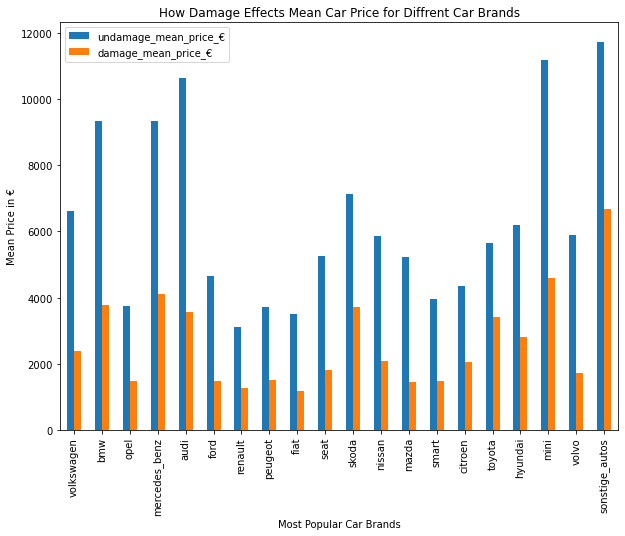

In [85]:
damaged_price_df.plot.bar(y=['undamage_mean_price_€', 'damage_mean_price_€'], 
                          title='How Damage Effects Mean Car Price for Diffrent Car Brands',
                          figsize = (10,7.5),
                          xlabel = 'Most Popular Second Hand Car Brands',
                          ylabel = 'Mean Price in €')




<AxesSubplot:title={'center':'Percentage Change in Mean Price of Car Brands When the Car Was Listed as Damaged'}, xlabel='Most Popular Second Hand Car Brands', ylabel='Percentage% Damaged/Undamaged'>

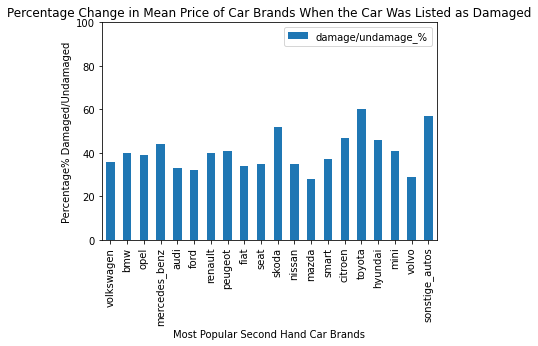

In [92]:
damaged_price_df.plot.bar(y='damage/undamage_%'
                         ,title = 'Percentage Change in Mean Price of Car Brands When the Car Was Listed as Damaged'
                         ,xlabel = 'Most Popular Second Hand Car Brands'
                         ,ylabel = 'Percentage% Damaged/Undamaged'
                         ,ylim=(0,100))

When we look at the ten most sold brands, we can see that there is a drastic difference between the undamaged and damaged cars. All of the damaged cars have a mean ` price_€` less than half compared to the undamaged counterparts. The most drastic we can see `ford` whose ` damage_mean_price_€`  32% the value of the ` undamage_mean_price_€`. 

# __Conclusion__

`Data Cleaning/ Data Exploration`: when we stated the project there where several parts of the dataset that required some sort of cleaning and formatting. We statted by changing the column names from camelCase into snake case to increase readability. We then precede to drop columns that have no impactful data, as a result we removed ` seller`, ` offer_type` and ` n_pictures` columns as they almost all contained a single value. We then proceeded to clean the ` odometer` and ` price` column by removing the non-numeric characters, changing the data type to `int`, placing the units in the column names and finally removing the outlining data. We determined that the ` odometer_km` had no values that needed to be removed, but the ` €_price` we removed all values outside the range of € 100 - € 500,000.  Next, we looked at the date columns and changed the `date_crawled`, `ad_created` and `last_seen` to a uniform numeric data. After the date cleaning we dropped incorrect data from the `registration month` and `registration year` column. We then replaced any German word with English words. Finally, we extracted two additional columns `brand_model` and `engine` and added them to the dataframe. 

`Data Analysis`: In this project we attempted to answer several questions, these are the following conclusions we can draw from our analysis.

- `Exploring Price of Car Brands`: When we looked at the mean price for the 20 most sold brands, we see that `mini` cars are the cars that are sold with the highest mean price being € 10,772.00 and the `renault` has the least with € 2, 578.00. We also determined that the brand `sonstige_autos` might have a misleading value as it refers to `Other Cars` and does not represent a single car brand.  

- `Top Brands vs Milage`: When we compared the 6 most sold brands, we saw that there was no drastic difference in milage. The highest milage belonged to `bmw` with 132,000 km and the lowest belonged to `ford` with 124,000 km, meaning that we only have a range of 8,000 km. We also commented on the fact that there was no distinguishing between luxury and affordable cars. 

- `Finding Most Common Model`: After we created our new column of `brand_model`, we could see that frequency of the brands. We can that the most sold brand is the `Volkswagen_golf` with 1,808 cars sold, which sold almost double the next most sold model being the `opel_corsa` with 1092. 

- `Comparing Milage to Mean Price`: When we placed the ` odometer_km` column into groups of `very_high`, `high`, `med` and `low` we saw that the cars in the `very_high` had the lowest price of € 4,273.00 followed by `high` € 8,673.00, `med` € 11,910.00 and `low` with the highest price of € 15,196.00. 

- `Comparing Mean Price with Car Damage`: Finally, we look at the average car prices for cars with and without damage. We looked at the brands and compered the mean price of the undamaged cars and the damaged versions. When we looked at the damaged cars we saw that they where worth less than half of there undamaged counterparts.  
